# Neraca Perdagangan Negara

Sumber: UN: Monthly Bulletin of Statistics (untuk data tahun 2010-2014 Issue No. 1125. Vol. LXIX. No. 3 March 2015)

Data Dikutip dari Statistik Indonesia <br>dataset : <a href='https://data.go.id/dataset/bps_api_0000336'>data.go.id</a>

> Pastikan url `dataset`

In [1]:
import pandas as pd

df = pd.read_csv('tes/Neraca Perdagangan.csv')
df.head()

,_id,idx,vervar,var,turvar,tahun,turtahun,nilai
0,1,0,Amerika Serikat,Neraca Perdagangan beberapa Negara,Ekspor,2000,NaN,781125.0
1,2,1,Amerika Serikat,Neraca Perdagangan beberapa Negara,Ekspor,2001,NaN,729100.0
2,3,2,Amerika Serikat,Neraca Perdagangan beberapa Negara,Ekspor,2002,NaN,693103.0
3,4,3,Amerika Serikat,Neraca Perdagangan beberapa Negara,Ekspor,2003,NaN,724771.0
4,5,4,Amerika Serikat,Neraca Perdagangan beberapa Negara,Ekspor,2004,NaN,818520.0


In [2]:
df.columns

Index(['_id', 'idx', 'vervar', 'var', 'turvar', 'tahun', 'turtahun', 'nilai'], dtype='object')

> Kita akan menghilangkan beberapa kolom yang tidak diperlukan dan manipulasi nama kolom sehingga bisa dibaca dengan baik

In [3]:
data = df.drop(['idx','var','turtahun'],axis=1)
df_new = data.rename(columns={'_id':'id','vervar':'negara','turvar':'var'})
df_new.head()

,id,negara,var,tahun,nilai
0,1,Amerika Serikat,Ekspor,2000,781125.0
1,2,Amerika Serikat,Ekspor,2001,729100.0
2,3,Amerika Serikat,Ekspor,2002,693103.0
3,4,Amerika Serikat,Ekspor,2003,724771.0
4,5,Amerika Serikat,Ekspor,2004,818520.0


### Deskripsi data

In [4]:
print(df_new.describe())

                id        tahun         nilai
count  1710.000000  1710.000000  1.447000e+03
mean    855.500000  2007.000000  1.696415e+06
std     493.778797     4.321758  3.987565e+07
min       1.000000  2000.000000  1.430000e+02
25%     428.250000  2003.000000  2.494800e+04
50%     855.500000  2007.000000  8.540700e+04
75%    1282.750000  2011.000000  2.728915e+05
max    1710.000000  2014.000000  1.073164e+09


> Dalam data ini terdapat kolom nilai yang kosong atau berisi (-). Kita akan mengganti nilai yang (-) dengan NaN <br>
> Mengecek apakah ada data yang Null, NaN atau Empty

In [5]:
df_new.isnull().sum()

id          0
negara      0
var         0
tahun       0
nilai     263
dtype: int64

> Menghilangkan data yang kosong atau Null

In [6]:
df_fix = df_new.dropna()

In [7]:
df_fix.isnull().sum()

id        0
negara    0
var       0
tahun     0
nilai     0
dtype: int64

> Menampilkan Neraca Perdagangan Indonesia

In [12]:
indonesia = df_fix[df_fix.negara == 'Indonesia']
indonesia.head()

,id,negara,var,tahun,nilai
630,631,Indonesia,Ekspor,2000,62124.0
631,632,Indonesia,Ekspor,2001,56321.0
632,633,Indonesia,Ekspor,2002,57159.0
633,634,Indonesia,Ekspor,2003,61058.0
634,635,Indonesia,Ekspor,2004,71585.0


> Membuat dan menampilkan grup Ekspor, Impor dan Neraca Perdagangan Indonesia berdasarkan tahun

In [14]:
ab = indonesia.groupby(['tahun','var','nilai','negara','id']).count()
ab

Empty DataFrame
Columns: []
Index: [(2000, Ekspor, 62124.0, Indonesia, 631), (2000, Impor, 33515.0, Indonesia, 646), (2000, Neraca Perdagangan, 28609.0, Indonesia, 661), (2001, Ekspor, 56321.0, Indonesia, 632), (2001, Impor, 30962.0, Indonesia, 647), (2001, Neraca Perdagangan, 25359.0, Indonesia, 662), (2002, Ekspor, 57159.0, Indonesia, 633), (2002, Impor, 31289.0, Indonesia, 648), (2002, Neraca Perdagangan, 25870.0, Indonesia, 663), (2003, Ekspor, 61058.0, Indonesia, 634), (2003, Impor, 32551.0, Indonesia, 649), (2003, Neraca Perdagangan, 28507.0, Indonesia, 664), (2004, Ekspor, 71585.0, Indonesia, 635), (2004, Impor, 46525.0, Indonesia, 650), (2004, Neraca Perdagangan, 25060.0, Indonesia, 665), (2005, Ekspor, 85660.0, Indonesia, 636), (2005, Impor, 57701.0, Indonesia, 651), (2005, Neraca Perdagangan, 27959.0, Indonesia, 666), (2006, Ekspor, 100799.0, Indonesia, 637), (2006, Impor, 61066.0, Indonesia, 652), (2006, Neraca Perdagangan, 39733.0, Indonesia, 667), (2007, Ekspor, 114101.0, Indonesia, 638), (2007, Impor, 74473.0, Indonesia, 653), (2007, Neraca Perdagangan, 39628.0, Indonesia, 668), (2008, Ekspor, 137020.0, Indonesia, 639), (2008, Impor, 129197.0, Indonesia, 654), (2008, Neraca Perdagangan, 7823.0, Indonesia, 669), (2009, Ekspor, 116510.0, Indonesia, 640), (2009, Impor, 96829.0, Indonesia, 655), (2009, Neraca Perdagangan, 19681.0, Indonesia, 670), (2010, Ekspor, 157779.0, Indonesia, 641), (2010, Impor, 135663.0, Indonesia, 656), (2010, Neraca Perdagangan, 22116.0, Indonesia, 671), (2011, Ekspor, 203497.0, Indonesia, 642), (2011, Impor, 177436.0, Indonesia, 657), (2011, Neraca Perdagangan, 26061.0, Indonesia, 672), (2012, Ekspor, 190020.0, Indonesia, 643), (2012, Impor, 191690.0, Indonesia, 658), (2012, Neraca Perdagangan, 1669.0, Indonesia, 673), (2013, Ekspor, 182552.0, Indonesia, 644), (2013, Impor, 186629.0, Indonesia, 659), (2013, Neraca Perdagangan, 4077.0, Indonesia, 674), (2014, Ekspor, 176293.0, Indonesia, 645), (2014, Impor, 178179.0, Indonesia, 660), (2014, Neraca Perdagangan, 1886.0, Indonesia, 675)]

In [15]:
impor = indonesia[indonesia["var"] == "Impor"]
ekspor = indonesia[indonesia["var"] == "Ekspor"]
neraca = indonesia[indonesia["var"] == "Neraca Perdagangan"]

> `Plot bar` 

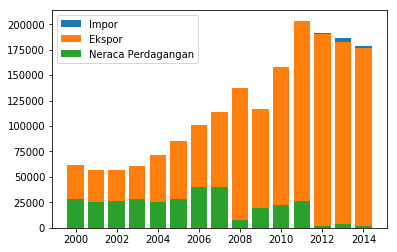

In [26]:
import matplotlib.pyplot as plt
import numpy as np

imx = impor['tahun']
imy = impor['nilai']
eksx = ekspor['tahun']
eksy = ekspor['nilai']
nerax = neraca['tahun']
neray = neraca['nilai']

fig, ax = plt.subplots()
ax.bar(imx,imy, label='Impor')
ax.bar(eksx,eksy, label='Ekspor')
ax.bar(nerax,neray, label='Neraca Perdagangan')

legend = ax.legend(loc='best', shadow=False, fontsize='medium')
legend.get_frame() #.set_facecolor('C0')
plt.show()

### Neraca Perdagangan Indonesia

> Plot Neraca Perdagangan

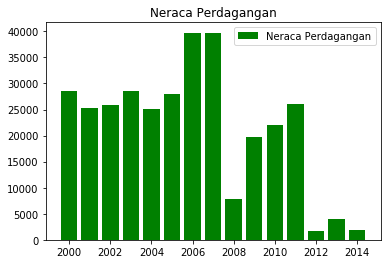

In [18]:
fig, ax = plt.subplots()
ax.bar(nerax,neray, label='Neraca Perdagangan',color='green')

legend = ax.legend(loc='best', shadow=False, fontsize='medium')
legend.get_frame() #.set_facecolor('C0')
plt.title('Neraca Perdagangan')
plt.show()

### Impor dan Ekspor Indonesia

> Plot Impor dan ekspor

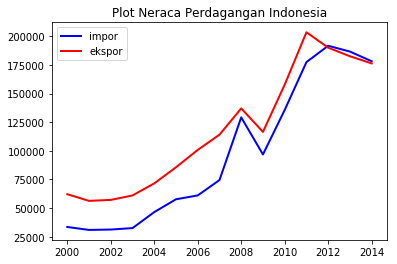

In [30]:
plt.plot(imx, imy, label='impor', color='blue',  linewidth='2')
plt.plot(eksx, eksy, label='ekspor', color='red', linewidth='2')

plt.legend()
plt.title('Plot Neraca Perdagangan Indonesia')
plt.show()

In [20]:
nc = np.array(ekspor['nilai']) - np.array(impor['nilai'])
nc

array([28609., 25359., 25870., 28507., 25060., 27959., 39733., 39628.,
        7823., 19681., 22116., 26061., -1670., -4077., -1886.])

### Scatter Plot Impor Indonesia

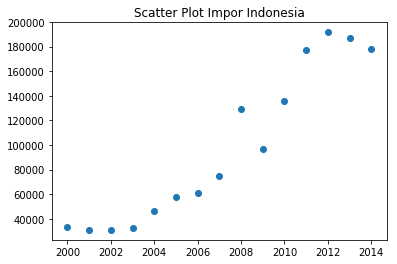

In [22]:
plt.scatter(impor['tahun'], impor['nilai'])
plt.title('Scatter Plot Impor Indonesia')
plt.show()

### Scatter Plot Ekspor Indonesia

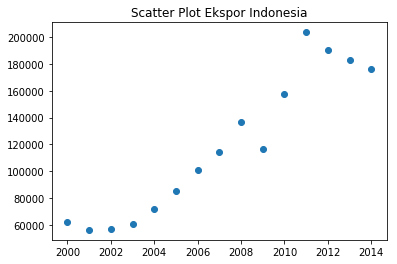

In [23]:
plt.scatter(ekspor['tahun'], ekspor['nilai'])
plt.title('Scatter Plot Ekspor Indonesia')
plt.show() 

### Scatter Plot Neraca Perdagangan Indonesia

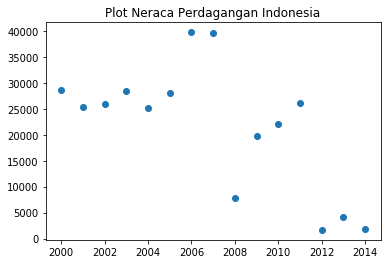

In [24]:
plt.scatter(neraca['tahun'], neraca['nilai'])
plt.title('Plot Neraca Perdagangan Indonesia')
plt.show() 